# Churn Prediction

**Customer churn** is a financial term that refers to the loss of a client or customer—that is, when a customer ceases to interact with a company or business. Similarly, the **churn rate** is the rate at which customers or clients are leaving a company within a specific period of time. A churn rate higher than a certain threshold can have both tangible and intangible effects on a company's business success. Ideally, companies like to retain as many customers as they can.

## Introduction

Taking a closer look, we see that the dataset contains 14 columns (also known as features or variables). The first 13 columns are the independent variable, while the last column is the dependent variable that contains a binary value of 1 or 0. Here, 1 refers to the case where the customer left the bank after 6 months, and 0 is the case where the customer didn't leave the bank after 6 months. This is known as a binary classification problem, where you have only two possible values for the dependent variable—in this case, a customer either leaves the bank after 6 months or doesn't.

It's important to mention that the data for the independent variables was collected 6 months before the data for the dependent variable, since the task is to develop a machine learning model that can predict whether a customer will leave the bank after 6 months, depending on the current feature values.

*Customer Churn Modelling Dataset*

**RowNumber** —corresponds to the record (row) number and has no effect on the output. This column will be removed.

**CustomerId** —contains random values and has no effect on customer leaving the bank. This column will be removed.

**Surname** —the surname of a customer has no impact on their decision to leave the bank. This column will be removed.

**CreditScore** —can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.

**Geography** —a customer's location can affect their decision to leave the bank. We'll keep this column.

**Gender** —it's interesting to explore whether gender plays a role in a customer leaving the bank. We'll include this column, too.

**Age** —this is certainly relevant, since older customers are less likely to leave their bank than younger ones.

**Tenure** —refers to the number of years that the customer has been a client of the bank. Normally,
older clients are more loyal and less likely to leave a bank.

**Balance** —also a very good indicator of customer churn, as people with a higher balance in their accounts are less 
likely to leave the bank compared to those with lower balances.

**NumOfProducts** —refers to the number of products that a customer has purchased through the bank.

**HasCrCard** —denotes whether or not a customer has a credit card. This column is also relevant, 
since people with a credit card are less likely to leave the bank.

**IsActiveMember** —active customers are less likely to leave the bank, so we'll keep this.

**EstimatedSalary** —as with balance, people with lower salaries are more likely to leave the bank compared to those 
with higher salaries.

**Exited** —whether or not the customer left the bank. This is what we have to predict.

## Exploratory Analysis 

In [2]:
## REQUIRED LIBRARIES

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [3]:
# Read the data frame
df = pd.read_csv('../Churn Prediction/churn2.csv')
df_churn=df.copy()

In [4]:
df_churn.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [5]:
df_churn.shape

(10000, 14)

In [6]:
df_churn.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
df_churn.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [8]:
# Check columns list and missing values
df_churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Surprisingly, we do not find any NULL or missing values in this data. This is really good for our analysis

In [9]:
# Get unique count for each variable
df_churn.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [10]:
# Drop the columns as explained above
dataset = df_churn.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [11]:
dataset.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


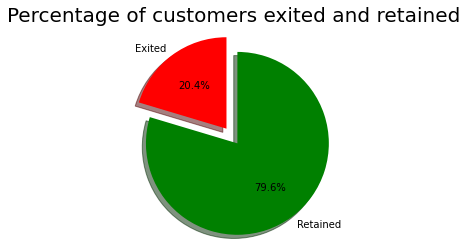

In [12]:
# Pie chart to display the amount (percentage) of customers churned and the ones retained

labels = ['Exited', 'Retained']
sizes = [dataset.Exited[dataset['Exited'] == 1].count(), dataset.Exited[dataset['Exited'] == 0].count()]
explode = [0.1, 0]

# create and plot the pie chart

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, radius=0.5, colors=['r', 'g'], )
plt.title("Percentage of customers exited and retained", size = 20)
plt.axis('equal')
plt.show()

From the given data, it is visible that around 20% of the people have exited or churned. So, we can try to create a machine learning model that can predict whether a customer will exit the bank or not given his/her banking data.

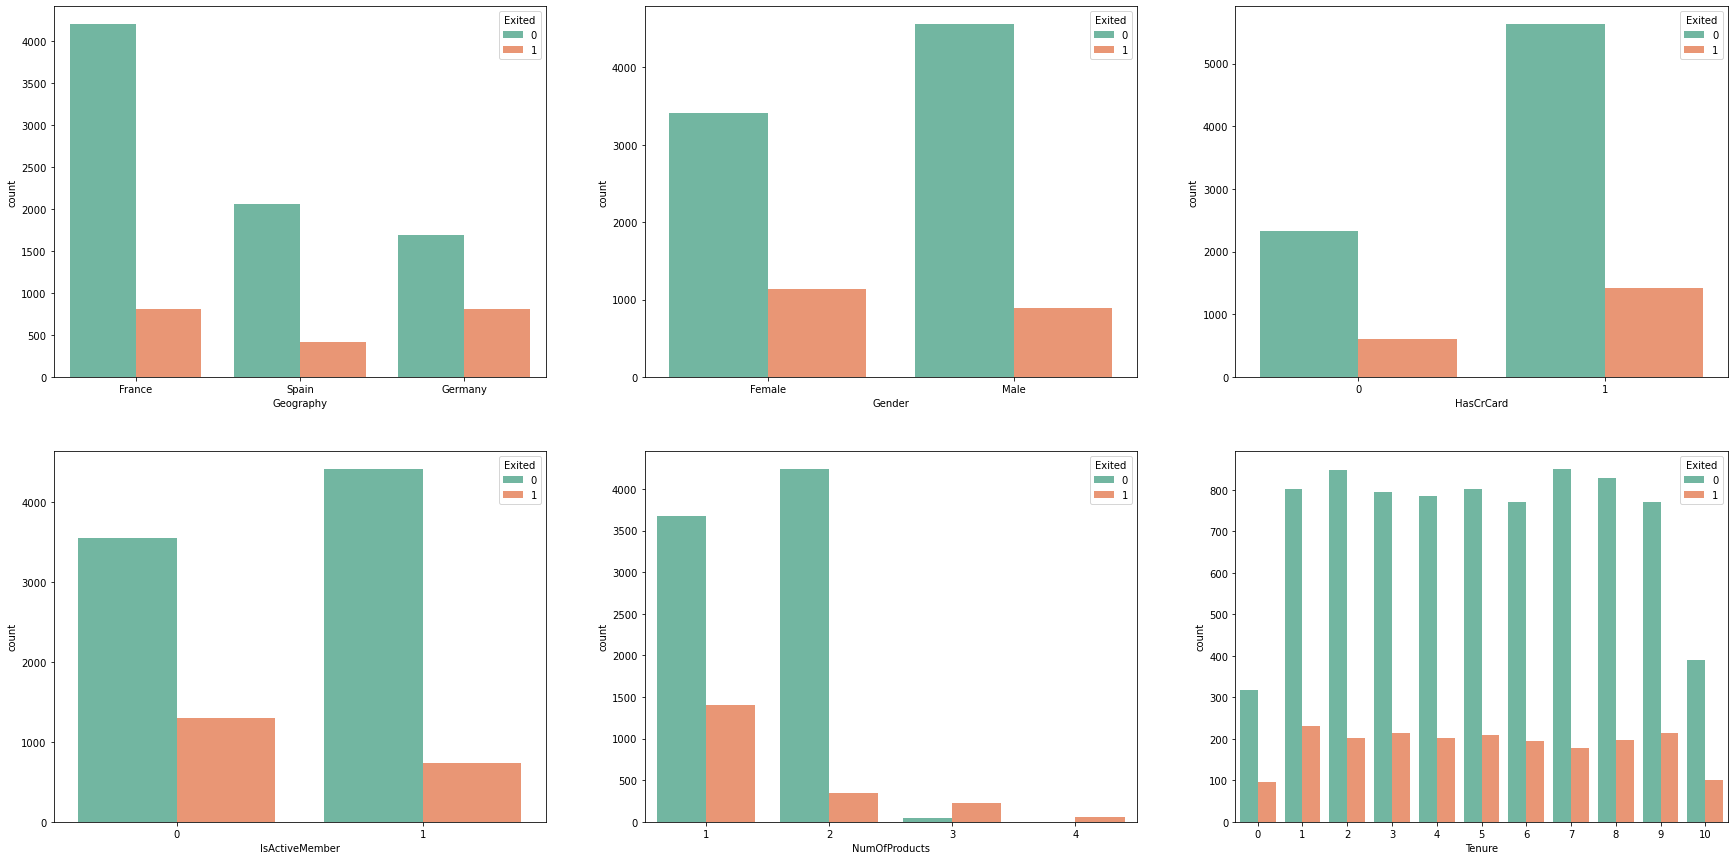

In [13]:
# Count column plots to map the dependence of 'Exited' column on categorical features

fig, ax = plt.subplots(2, 3, figsize=(30, 15))

sns.countplot(x='Geography', hue='Exited', data=dataset, palette='Set2', ax=ax[0][0])
sns.countplot(x='Gender', hue='Exited', data=dataset, palette='Set2', ax=ax[0][1])
sns.countplot(x='HasCrCard', hue='Exited', data=dataset, palette='Set2', ax=ax[0][2])
sns.countplot(x='IsActiveMember', hue='Exited', data=dataset, palette='Set2', ax=ax[1][0])
sns.countplot(x='NumOfProducts', hue='Exited', data=dataset, palette='Set2', ax=ax[1][1])
sns.countplot(x='Tenure', hue='Exited', data=dataset, palette='Set2', ax=ax[1][2])

plt.show()

   - **Geography**: We can see that majority of the data is about people France. Ideally for an evenly-distributed data, if the amount of people from a place is the majority, then the majority of churning should also be within that group. However, it is not so in this case as we see that number of exited people who belong to Germany is almost equal to the number of exits from France.
   - **Gender**: We can clearly see the Female customers had more exits than the male customers.
   - **Credit cards**: It is generally expected that people who have more interactions and products of the bank, would likely be retained for a longer time. However, we can see that people who have credit cards have more exits than those who do not own credit cards.
   - **Active Member**: This is an expected observation. We can see that inactive members have been churned more than members who are active.
   - **Number of Products**: This is also an expected observation, where we see that customers who own more products from the bank are likely to be retained for a longer time than those who own less products.
   - **Tenure**: We see that the tenure of a customer does not really tell us much if that customer is likely to be churned or not. Initially, it looks like new joinees and older people (10 years) have been churned less. However, on a closer analysis we can see that the overall number of retained customer are significantly less in both these cases. As a result, we can probably conclude that new joinees and older customers may be more likely to be churned as their churn rate (percentage) is likely to be higher than other tenure rates.

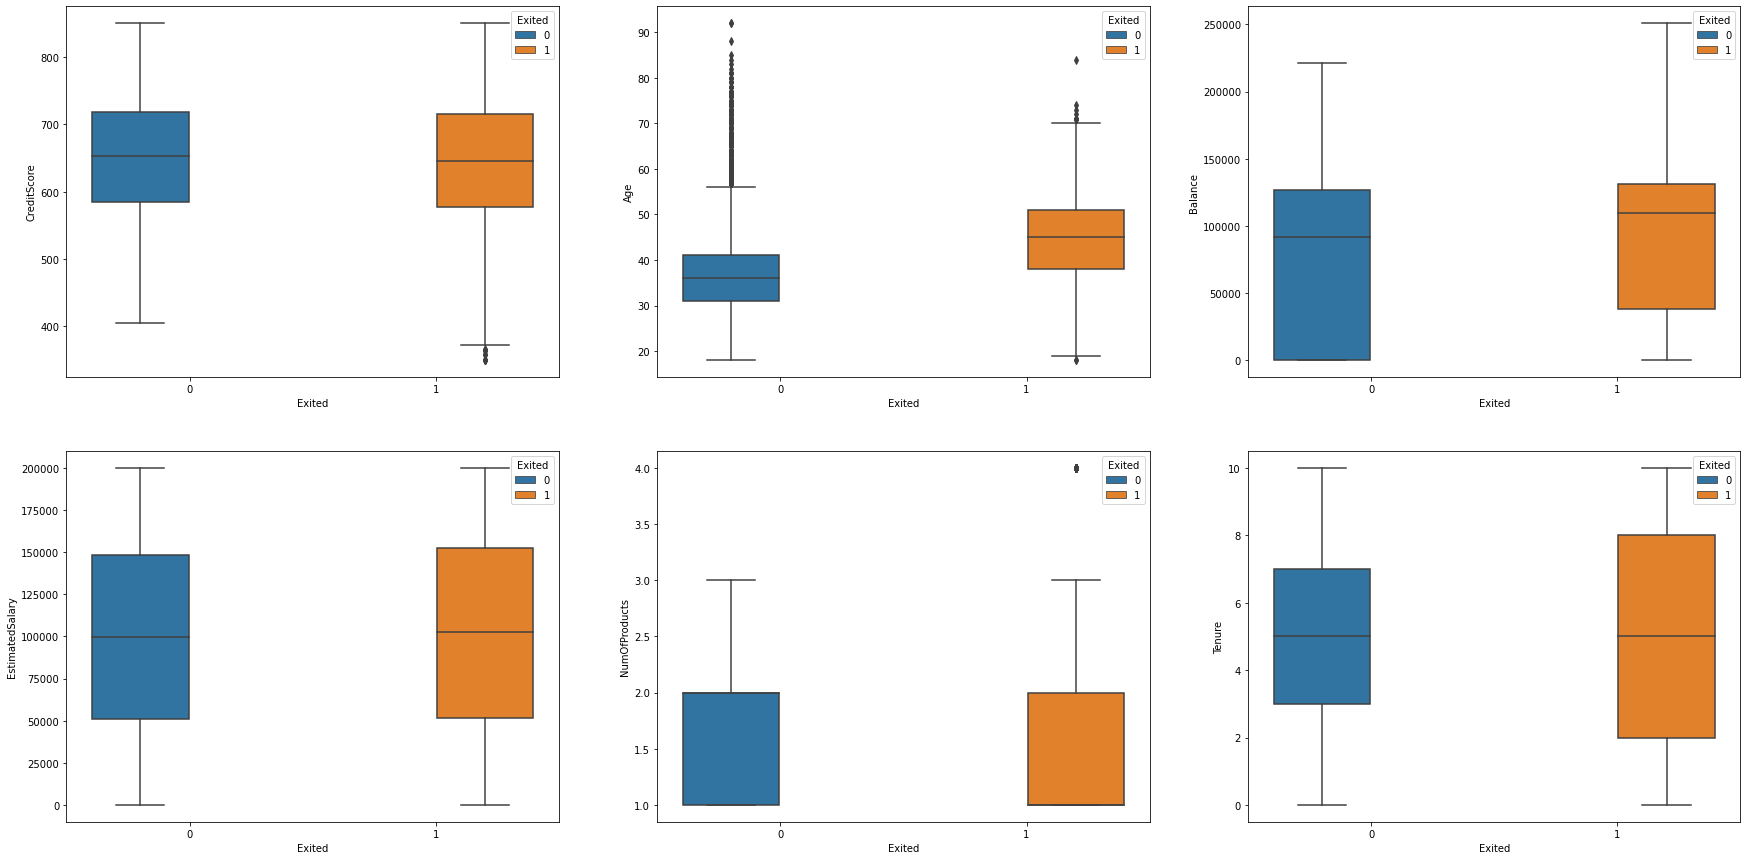

In [14]:
# Count column plots to map the dependence of 'Exited' column on continuous and numerical features

fig, ax = plt.subplots(2, 3, figsize=(30, 15))

sns.boxplot(data=dataset, x='Exited', y='CreditScore', hue='Exited', ax=ax[0][0])
sns.boxplot(data=dataset, x='Exited', y='Age', hue='Exited', ax=ax[0][1])
sns.boxplot(data=dataset, x='Exited', y='Balance', hue='Exited', ax=ax[0][2])
sns.boxplot(data=dataset, x='Exited', y='EstimatedSalary', hue='Exited', ax=ax[1][0])
sns.boxplot(data=dataset, x='Exited', y='NumOfProducts', hue='Exited', ax=ax[1][1])
sns.boxplot(data=dataset, x='Exited', y='Tenure', hue='Exited', ax=ax[1][2])

plt.show()

  -  **Credit Score**: We can see that Credit Score does not have much effect on the customer churn.
  -  **Age**: Here we can see that the older customers are more likely to be churned from the bank. This is most probably to keep a younger manpower in the organization.
  - **Balance**: When it comes to Balance, we see that the bank is losing a significant number of customers with high balance in their accounts. This is likely to affect the bank's capital as well.
  - **Estimated Salary**: Estimated Salary does not seem to affect the customer churn much.
  - **Number of Products**: We see that the number of products also does not seem to affect the customer churn.
  - **Tenure**: For tenure, as we can see here too, customer belonging more to the two extreme tenure groups (new joinees and older ones) are more likely to be churned.

## Data Preprocessing

In [15]:
# list of continuous and categorical variables/features

continuous_vars = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary']
categorical_vars = ['HasCrCard', 'IsActiveMember','Geography', 'Gender']

# separating the train and test data using a 80%-20% split

dataset_train = dataset.sample(frac=0.8, random_state=100)
dataset_test = dataset.drop(dataset_train.index)

# check the number of rows in each data set for verification

print('Number of rows in train data: ', len(dataset_train))
print('Number of rows in test data: ', len(dataset_test))

print()

dataset_train = dataset_train[['Exited'] + continuous_vars + categorical_vars]
dataset_train.head()


Number of rows in train data:  8000
Number of rows in test data:  2000



,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember,Geography,Gender
8018,1,632,23,3,122478.51,1,147230.77,1,0,Germany,Male
9225,0,594,32,4,120074.97,2,162961.79,1,1,Germany,Female
3854,0,687,33,9,135962.40,2,121747.96,1,0,Germany,Male
2029,0,520,33,4,156297.58,2,166102.61,1,1,France,Male
3539,0,667,42,6,0.00,1,88890.05,1,0,France,Male


In [16]:
# turning 0 values of numerical categorical features into -1
# to introduce negative relation in the calculations

dataset_train.loc[dataset_train.HasCrCard == 0, 'HasCrCard'] = -1
dataset_train.loc[dataset_train.IsActiveMember == 0, 'IsActiveMember'] = -1

dataset_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember,Geography,Gender
8018,1,632,23,3,122478.51,1,147230.77,1,-1,Germany,Male
9225,0,594,32,4,120074.97,2,162961.79,1,1,Germany,Female
3854,0,687,33,9,135962.40,2,121747.96,1,-1,Germany,Male
2029,0,520,33,4,156297.58,2,166102.61,1,1,France,Male
3539,0,667,42,6,0.00,1,88890.05,1,-1,France,Male


In [17]:
# list of categorical variables

var_list = ['Geography', 'Gender']

# turning the categorical variables into one-hot vectors

for var in var_list:
  for val in dataset_train[var].unique():
    dataset_train[var + '_' + val] = np.where(dataset_train[var] == val, 1, -1)

dataset_train = dataset_train.drop(var_list, axis=1)

dataset_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember,Geography_Germany,Geography_France,Geography_Spain,Gender_Male,Gender_Female
8018,1,632,23,3,122478.51,1,147230.77,1,-1,1,-1,-1,1,-1
9225,0,594,32,4,120074.97,2,162961.79,1,1,1,-1,-1,-1,1
3854,0,687,33,9,135962.40,2,121747.96,1,-1,1,-1,-1,1,-1
2029,0,520,33,4,156297.58,2,166102.61,1,1,-1,1,-1,1,-1
3539,0,667,42,6,0.00,1,88890.05,1,-1,-1,1,-1,1,-1


In [18]:
min_values = dataset_train[continuous_vars].min()
max_values = dataset_train[continuous_vars].max()

dataset_train[continuous_vars] = (dataset_train[continuous_vars] - min_values) / (max_values - min_values)
dataset_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember,Geography_Germany,Geography_France,Geography_Spain,Gender_Male,Gender_Female
8018,1,0.564,0.067568,0.3,0.488160,0.000000,0.736166,1,-1,1,-1,-1,1,-1
9225,0,0.488,0.189189,0.4,0.478581,0.333333,0.814829,1,1,1,-1,-1,-1,1
3854,0,0.674,0.202703,0.9,0.541903,0.333333,0.608740,1,-1,1,-1,-1,1,-1
2029,0,0.340,0.202703,0.4,0.622952,0.333333,0.830534,1,1,-1,1,-1,1,-1
3539,0,0.634,0.324324,0.6,0.000000,0.000000,0.444435,1,-1,-1,1,-1,1,-1


## Machine Learning classifiers (selecting optimal parameters)

In [28]:
# important libraries

from sklearn.model_selection import GridSearchCV

# models

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import XGBClassifier

# metrics

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [20]:
# this method will show us the details of each model
# which will help us in deciding the best model

def best_model(model):
  print(model.best_score_)
  print(model.best_params_)
  print(model.best_estimator_)

In [37]:
# SGD classifier

sgd_model = SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                          early_stopping=False, epsilon=0.1, eta0=0.0,
                          fit_intercept=True, l1_ratio=0.15,
                          learning_rate='optimal', loss='log', max_iter=300,
                          n_iter_no_change=5, n_jobs=None, penalty='l2', 
                          power_t=0.5, random_state=None, shuffle=True,
                          tol=1e-06, validation_fraction=0.1, verbose=0,
                          warm_start=False)

sgd_model.fit(dataset_train.loc[:, dataset_train.columns != 'Exited'], dataset_train.Exited)

SGDClassifier(loss='log', max_iter=300, tol=1e-06)

In [38]:
print('[INFO] SGD classifier:\n')
print(classification_report(dataset_train.Exited, sgd_model.predict(dataset_train.loc[:, dataset_train.columns != 'Exited'])))

[INFO] SGD classifier:

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      6382
           1       0.62      0.21      0.32      1618

    accuracy                           0.81      8000
   macro avg       0.73      0.59      0.61      8000
weighted avg       0.79      0.81      0.78      8000



In [33]:
# Logistic Regression classifier

lr_model = LogisticRegression(C=0.1, class_weight=None, dual=False, 
                              fit_intercept=True, intercept_scaling=1,
                              l1_ratio=None, max_iter=50, multi_class='auto',
                              n_jobs=None, penalty='l2', random_state=None,
                              solver='lbfgs', tol=1e-05, verbose=0,
                              warm_start=False)

lr_model.fit(dataset_train.loc[:, dataset_train.columns != 'Exited'], dataset_train.Exited)

LogisticRegression(C=0.1, max_iter=50, tol=1e-05)

In [34]:
print('[INFO] Logistic Regression classifier:\n')
print(classification_report(dataset_train.Exited, lr_model.predict(dataset_train.loc[:, dataset_train.columns != 'Exited'])))

[INFO] Logistic Regression classifier:

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      6382
           1       0.69      0.15      0.25      1618

    accuracy                           0.81      8000
   macro avg       0.75      0.57      0.57      8000
weighted avg       0.79      0.81      0.76      8000



In [35]:

# Random Forest classifier

rf_model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                  class_weight=None, criterion='gini', 
                                  max_depth=9, max_features=9,
                                  max_leaf_nodes=None, max_samples=None,
                                  min_impurity_decrease=0.0, 
                                  min_impurity_split=None, min_samples_leaf=1, 
                                  min_samples_split=7, 
                                  min_weight_fraction_leaf=0.0, n_estimators=50,
                                  n_jobs=None, oob_score=False,
                                  random_state=None, verbose=0,
                                  warm_start=False)

rf_model.fit(dataset_train.loc[:, dataset_train.columns != 'Exited'], dataset_train.Exited)

RandomForestClassifier(max_depth=9, max_features=9, min_samples_split=7,
                       n_estimators=50)

In [43]:
print('[INFO] Random Forest classifier:\n')
print(classification_report(dataset_train.Exited, rf_model.predict(dataset_train.loc[:, dataset_train.columns != 'Exited'])))

[INFO] Random Forest classifier:

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      6382
           1       0.89      0.55      0.68      1618

    accuracy                           0.90      8000
   macro avg       0.89      0.77      0.81      8000
weighted avg       0.89      0.90      0.89      8000

